In [88]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import matplotlib.pyplot as plt
import seaborn as sns

y_label = 'Renewal_Flag'
df = pd.read_csv("data/Slot Performance Data.csv")
df[['StartDate','EndDate']] = df[['StartDate','EndDate']].apply(pd.to_datetime)
df['day_diff'] = (df['EndDate'] - df['StartDate']).dt.days

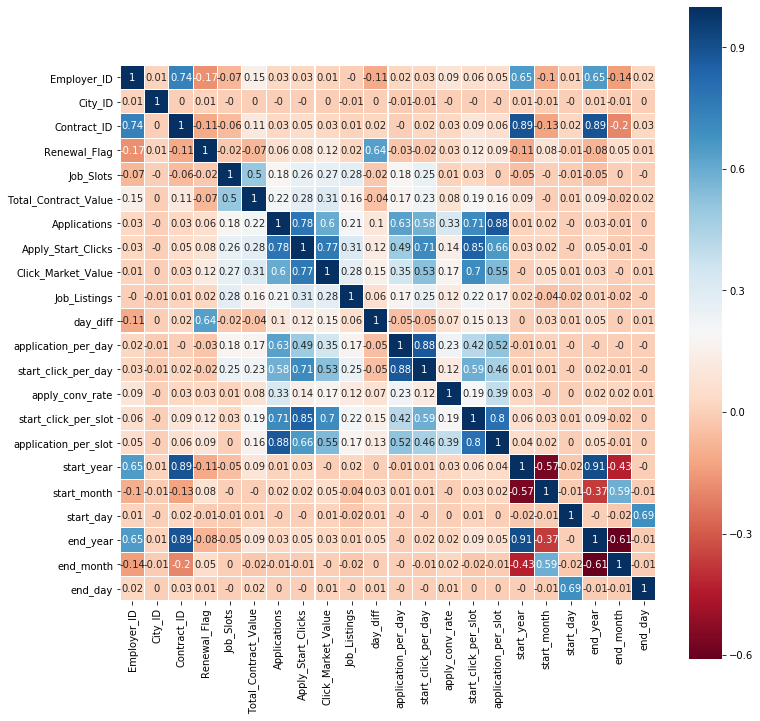

In [74]:
df_metrics = df
df_metrics['application_per_day'] = df['Applications'] / df['day_diff']
df_metrics['start_click_per_day'] = df['Apply_Start_Clicks'] / df['day_diff']
df_metrics['apply_conv_rate'] = (df['Applications'] / df['Apply_Start_Clicks']).replace(np.nan, 0)

df_metrics['start_click_per_slot'] = df['Apply_Start_Clicks'] / df['Job_Slots']
df_metrics['application_per_slot'] = df['Applications'] / df['Job_Slots']

df_metrics['start_year'] = pd.DatetimeIndex(df_metrics['StartDate']).year
df_metrics['start_month'] = pd.DatetimeIndex(df_metrics['StartDate']).month
df_metrics['start_day'] = pd.DatetimeIndex(df_metrics['StartDate']).day
df_metrics['end_year'] = pd.DatetimeIndex(df_metrics['EndDate']).year
df_metrics['end_month'] = pd.DatetimeIndex(df_metrics['EndDate']).month
df_metrics['end_day'] = pd.DatetimeIndex(df_metrics['EndDate']).day

colormap = plt.cm.RdBu
f, axs = plt.subplots(1, 1, figsize=(12, 12))
#ax = plt.subplot(3, 3, idx + 1)
sns.heatmap(df_metrics.corr(method='pearson', min_periods=1).round(decimals=2), linewidths=0.1, vmax=1.0, square=True,
            cmap=colormap, linecolor='white', annot=True)
#plt.xticks(rotation=30, fontsize=7)
plt.show()

In [75]:
df_train = df_metrics.replace([np.inf, -np.inf], np.nan).dropna()
df_train.drop(['Employer_ID', 'City_ID', 'Contract_ID', 'StartDate', 'EndDate'], axis=1, inplace=True)
training_set, testing_test = train_test_split(df_train, test_size=0.2)
y_train, y_test = training_set[y_label], testing_test[y_label]
x_train, x_test = training_set.drop(y_label, axis=1), testing_test.drop(y_label, axis=1)
x_train

,Job_Slots,Total_Contract_Value,Applications,Apply_Start_Clicks,Click_Market_Value,Job_Listings,day_diff,application_per_day,start_click_per_day,apply_conv_rate,start_click_per_slot,application_per_slot,start_year,start_month,start_day,end_year,end_month,end_day
2537,50,1495,0,40,1969.80,0,30,0.000000,1.333333,0.000000,0.800000,0.000000,2017,7,11,2017,8,10
22318,15,1245,0,40,940.80,0,9,0.000000,4.444444,0.000000,2.666667,0.000000,2017,8,5,2017,8,14
1233,15,495,0,0,0.00,0,30,0.000000,0.000000,0.000000,0.000000,0.000000,2017,3,19,2017,4,18
13832,15,495,0,0,0.00,0,13,0.000000,0.000000,0.000000,0.000000,0.000000,2016,9,27,2016,10,10
15004,15,995,125,155,3018.15,0,29,4.310345,5.344828,0.806452,10.333333,8.333333,2018,1,30,2018,2,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29235,15,1495,255,320,8883.75,0,30,8.500000,10.666667,0.796875,21.333333,17.000000,2017,7,7,2017,8,6
32573,15,995,20,40,736.00,0,2,10.000000,20.000000,0.500000,2.666667,1.333333,2017,10,30,2017,11,1
21506,15,495,10,30,1135.00,0,30,0.333333,1.000000,0.333333,2.000000,0.666667,2017,8,2,2017,9,1
2354,15,995,0,0,0.00,0,12,0.000000,0.000000,0.000000,0.000000,0.000000,2017,3,12,2017,3,24


In [76]:
x_train.isna().sum()

Job_Slots               0
Total_Contract_Value    0
Applications            0
Apply_Start_Clicks      0
Click_Market_Value      0
Job_Listings            0
day_diff                0
application_per_day     0
start_click_per_day     0
apply_conv_rate         0
start_click_per_slot    0
application_per_slot    0
start_year              0
start_month             0
start_day               0
end_year                0
end_month               0
end_day                 0
dtype: int64

In [77]:
def get_prediction_precision(model):
    y_pred = model.predict(x_test)
    n_correct = sum(y_pred == y_test)
    #print("n_correct:{}".format(n_correct))
    print("accuracy: {}".format(float(n_correct) / len(y_pred)))
    
rf_clf = RandomForestClassifier(n_estimators=500)
rf_clf.fit(x_train, y_train)
get_prediction_precision(rf_clf)

accuracy: 0.927555496477469


Feature ranking:
1. feature day_diff (0.4875259540664146)
2. feature end_month (0.0656643963929047)
3. feature Click_Market_Value (0.06423705791711305)
4. feature start_month (0.050116473855049186)
5. feature start_click_per_day (0.040357618088312154)
6. feature end_day (0.036793948209534355)
7. feature start_day (0.035728147050117426)
8. feature start_year (0.03383596182872068)
9. feature Total_Contract_Value (0.026524683313052844)
10. feature Apply_Start_Clicks (0.026346070848037282)
11. feature start_click_per_slot (0.026317228759936674)
12. feature application_per_day (0.024953740128806943)
13. feature end_year (0.020527731789404174)
14. feature apply_conv_rate (0.018545079977522087)
15. feature Applications (0.014547438349292672)
16. feature application_per_slot (0.014528305603363389)
17. feature Job_Listings (0.01148501608353638)
18. feature Job_Slots (0.0019651477388812734)


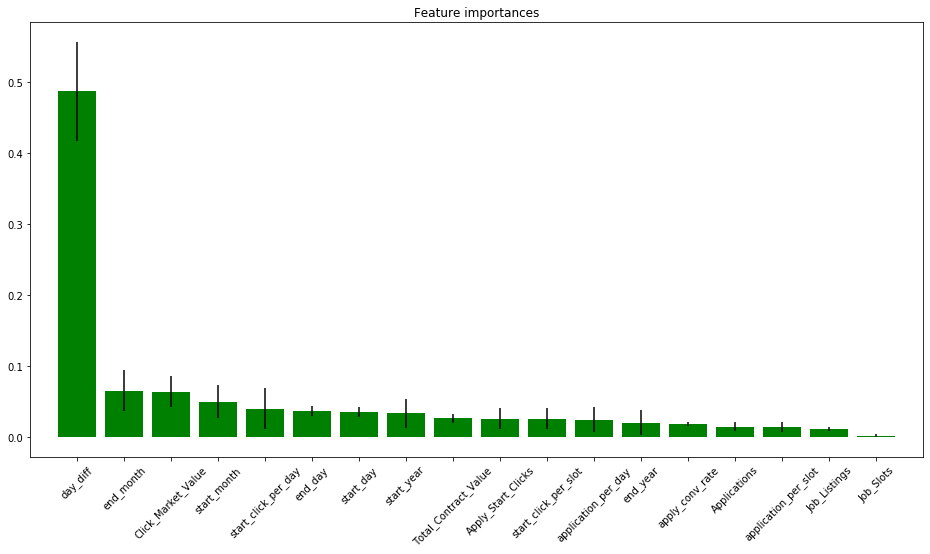

In [87]:
importances = rf_clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf_clf.estimators_], axis=0)
indices = np.argsort(importances)[::-1]
feature_names = []

print("Feature ranking:")
for f in range(x_train.shape[1]):
    feature_name = x_train.columns[indices[f]]
    feature_names.append(feature_name)
    print("{}. feature {} ({})".format(f + 1, feature_name, importances[indices[f]]))

# Plot the feature importances of the forest
f, axs = plt.subplots(1, 1, figsize=(16, 8))
plt.title("Feature importances")
plt.bar(range(x_train.shape[1]), importances[indices], color="g", yerr=std[indices], align="center")
plt.xticks(range(x_train.shape[1]), feature_names)
plt.xlim([-1, x_train.shape[1]])
plt.xticks(rotation=45)
plt.show()

In [92]:
gb_clf = GradientBoostingClassifier(n_estimators=2500)
gb_clf.fit(x_train, y_train)
get_prediction_precision(gb_clf)

accuracy: 0.9302140103682042


Feature ranking:
1. feature day_diff (0.6931774934953555)
2. feature end_month (0.1412048011494372)
3. feature start_year (0.05928139738367444)
4. feature Click_Market_Value (0.03747814396040809)
5. feature start_month (0.011708951754668897)
6. feature apply_conv_rate (0.009685878520478272)
7. feature start_day (0.009408569779130616)
8. feature start_click_per_day (0.006716393479264069)
9. feature Total_Contract_Value (0.005699463321951191)
10. feature start_click_per_slot (0.0046202899410910745)
11. feature Apply_Start_Clicks (0.004205497979942377)
12. feature end_day (0.004187367888585296)
13. feature application_per_day (0.0033687354397798183)
14. feature Job_Listings (0.003356927741349666)
15. feature application_per_slot (0.002625917337791648)
16. feature Applications (0.0017517814421153662)
17. feature end_year (0.0009883721047965173)
18. feature Job_Slots (0.0005340172801798628)


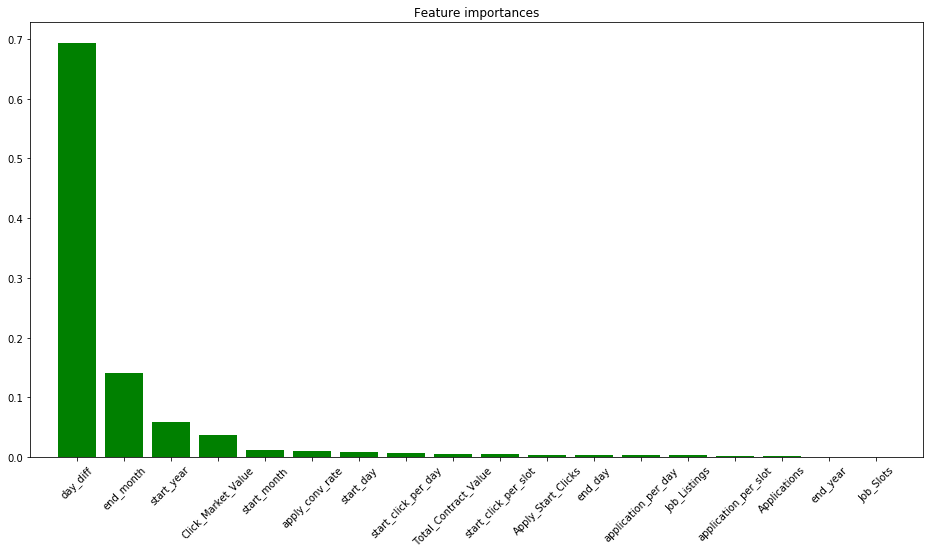

In [97]:
importances = gb_clf.feature_importances_
#std = np.std([tree.feature_importances_ for tree in gb_clf.estimators_], axis=0)
indices = np.argsort(importances)[::-1]
feature_names = []

print("Feature ranking:")
for f in range(x_train.shape[1]):
    feature_name = x_train.columns[indices[f]]
    feature_names.append(feature_name)
    print("{}. feature {} ({})".format(f + 1, feature_name, importances[indices[f]]))

# Plot the feature importances of the forest
f, axs = plt.subplots(1, 1, figsize=(16, 8))
plt.title("Feature importances")
plt.bar(range(x_train.shape[1]), importances[indices], color="g", align="center")
plt.xticks(range(x_train.shape[1]), feature_names)
plt.xlim([-1, x_train.shape[1]])
plt.xticks(rotation=45)
plt.show()